In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import math 

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Gráficos
# ==============================================================================
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Asunciones y Preprocesamiento
# ==============================================================================
from scipy import stats
import math
from scipy.stats import levene
import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools

# ANOVA
# ==============================================================================
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA

#Linear Regresion con Sklearn
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Tamaño gráficas
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, StandardScaler,OneHotEncoder



In [2]:
df= pd.read_csv("df_estandarizado.csv", index_col = 0)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,instant
0,0,0,1,0,1.497785,-1.469753,1.112127,-0.827613,-0.680818,1.252343,-0.387833,-0.755455,-1.927745,-1.820972,-1.729680
1,0,0,1,0,-1.495052,-1.469753,1.112127,-0.722069,-0.741507,0.480996,0.748899,-1.046996,-1.917480,-1.916078,-1.724934
2,0,0,1,0,-0.996246,0.680387,-0.724644,-1.635432,-1.750344,-1.338073,0.745931,-1.063031,-1.558846,-1.632827,-1.720189
3,0,0,1,0,-0.497440,0.680387,-0.724644,-1.615560,-1.610886,-0.261577,-0.389769,-1.080523,-1.414494,-1.522732,-1.715444
4,0,0,1,0,0.001367,0.680387,-0.724644,-1.468226,-1.505615,-1.340294,-0.046477,-1.118424,-1.373434,-1.503090,-1.710698


In [3]:
df2= pd.read_csv("Bicicletas_limpio.csv", index_col = 0)
df2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday       float64
workingday    float64
weathersit    float64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual        float64
registered    float64
cnt           float64
instant       float64
dtype: object

Las columnas son todas numéricas (chachi) 💓

<AxesSubplot:>

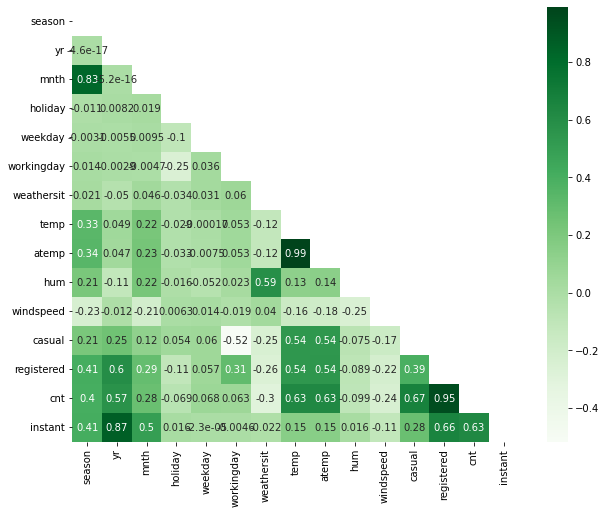

In [5]:
fig, ax = plt.subplots(figsize = (10,8))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask = mask, cmap='Greens',xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot= True )

In [6]:
x=df.drop(columns = ['registered'])
y = df['registered']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


# Creamos la regresiónn lineal
LR = LinearRegression(normalize= True) # nos aseguramos de que se normalizan los datos
# Ajustamos el modelo

LR.fit(x_train,y_train)
y_prediction_train =  LR.predict(x_train)
Adj_r2_train = 1 - (1-r2_score(y_train,y_prediction_train)) * (x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

y_prediction =  LR.predict(x_test)
Adj_r2_test = 1 - (1-r2_score(y_test, y_prediction)) * (x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)

# Para el conjunto de entrenamiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_prediction_train))
print('El valor de r2 score adjusted es ',Adj_r2_train)
print('El MAE es',mean_absolute_error(y_train,y_prediction_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_prediction_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El valor de r2 score adjusted es ',Adj_r2_test)
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

Para el conjunto train:---------------
El valor de r2 score es  1.0
El valor de r2 score adjusted es  1.0
El MAE es 1.252423194286794e-15
EL RMSE es  1.6424752653423176e-15
Para el conjunto test:---------------
El valor de r2 score es  1.0
El valor de r2 score adjusted es  1.0
El MAE es 1.2520663729553697e-15
EL RMSE es  1.758635655606918e-15


El ajuste lineal (r2) es 1 👀👀👀👀

El MAE está cerca de 0 también, eso es bueno.

El RMSE está cerca de 0 también, eso es genial (aunque es un poco mayor que el MAE)

Los datos en el conjunto test son un poco más elevados (sólo el RMSE), así que está bien hecho.

- Conclusión:

Todas las variables que están en nuestro dataset sirven para hacer modelos predictivos, es decir, no sobra ninguna. De todas maneras, probamos a ver como quedaría la regresión con las variables que desechamos el otro día en el MANOVA (temp y atemp)

In [7]:
x=df.drop(columns = ['registered', 'temp', 'atemp'])
y = df['registered']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


# Creamos la regresiónn lineal
LR = LinearRegression(normalize= True) # nos aseguramos de que se normalizan los datos
# Ajustamos el modelo

LR.fit(x_train,y_train)
y_prediction_train =  LR.predict(x_train)
Adj_r2_train = 1 - (1-r2_score(y_train,y_prediction_train)) * (x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

y_prediction =  LR.predict(x_test)
Adj_r2_test = 1 - (1-r2_score(y_test, y_prediction)) * (x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)

# Para el conjunto de entrenamiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_prediction_train))
print('El valor de r2 score adjusted es ',Adj_r2_train)
print('El MAE es',mean_absolute_error(y_train,y_prediction_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_prediction_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El valor de r2 score adjusted es ',Adj_r2_test)
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

Para el conjunto train:---------------
El valor de r2 score es  1.0
El valor de r2 score adjusted es  1.0
El MAE es 7.69765998439828e-16
EL RMSE es  9.634871559904262e-16
Para el conjunto test:---------------
El valor de r2 score es  1.0
El valor de r2 score adjusted es  1.0
El MAE es 7.425329377239355e-16
EL RMSE es  9.046602065455412e-16


Al quitarlas, podemos observar que el r2 es el mismo, sigue siendo 1, pero el MAE y RMSE son algo más bajas, pero casi ni se aprecia (estás serían como 0.00000000000000009 y el de arriba es 00000000000000017).

# Vamos a mirarlo sin estandarizar y sin quitar los outliers

In [10]:
df2.dtypes

instant         int64
dteday         object
season         object
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [11]:
x=df2.drop(columns = ['registered', 'season', 'dteday'])
y = df2['registered']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


# Creamos la regresiónn lineal
LR = LinearRegression(normalize= True) # nos aseguramos de que se normalizan los datos
# Ajustamos el modelo

LR.fit(x_train,y_train)
y_prediction_train =  LR.predict(x_train)
Adj_r2_train = 1 - (1-r2_score(y_train,y_prediction_train)) * (x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

y_prediction =  LR.predict(x_test)
Adj_r2_test = 1 - (1-r2_score(y_test, y_prediction)) * (x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)

# Para el conjunto de entrenamiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_prediction_train))
print('El valor de r2 score adjusted es ',Adj_r2_train)
print('El MAE es',mean_absolute_error(y_train,y_prediction_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_prediction_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El valor de r2 score adjusted es ',Adj_r2_test)
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

Para el conjunto train:---------------
El valor de r2 score es  1.0
El valor de r2 score adjusted es  1.0
El MAE es 1.15110964900053e-12
EL RMSE es  1.5272844631646557e-12
Para el conjunto test:---------------
El valor de r2 score es  1.0
El valor de r2 score adjusted es  1.0
El MAE es 1.1711301639267843e-12
EL RMSE es  1.4831308813187465e-12


In [12]:
def get_VIF(dataframe, target):
        X = add_constant(dataframe.loc[:, dataframe.columns != target])
        seriesObject = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index=X.columns,).sort_values(ascending= False)
        return seriesObject

In [20]:
get_VIF(df2.drop(columns = ['temp','atemp','season', 'dteday']),'registered')


instant       581.555277
yr            442.017385
mnth          146.405036
const          58.568720
cnt             6.744086
casual          5.542037
workingday      2.981853
weathersit      1.896909
hum             1.856778
windspeed       1.203748
holiday         1.090984
weekday         1.033760
dtype: float64

In [21]:
get_VIF(df2.drop(columns = ['temp','atemp','cnt', 'yr', 'season', 'dteday','mnth']),'registered')

const         53.364816
hum            1.749022
weathersit     1.737560
casual         1.726277
workingday     1.556438
windspeed      1.173549
instant        1.124878
holiday        1.090621
weekday        1.030983
dtype: float64

In [22]:
x=df2.drop(columns = ['temp','atemp','cnt', 'yr', 'season', 'dteday','mnth', 'registered'])
y = df2['registered']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


# Creamos la regresiónn lineal
LR = LinearRegression(normalize= True) # nos aseguramos de que se normalizan los datos
# Ajustamos el modelo

LR.fit(x_train,y_train)
y_prediction_train =  LR.predict(x_train)
Adj_r2_train = 1 - (1-r2_score(y_train,y_prediction_train)) * (x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

y_prediction =  LR.predict(x_test)
Adj_r2_test = 1 - (1-r2_score(y_test, y_prediction)) * (x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)

# Para el conjunto de entrenamiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_prediction_train))
print('El valor de r2 score adjusted es ',Adj_r2_train)
print('El MAE es',mean_absolute_error(y_train,y_prediction_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_prediction_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El valor de r2 score adjusted es ',Adj_r2_test)
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

Para el conjunto train:---------------
El valor de r2 score es  0.7702487132634065
El valor de r2 score adjusted es  0.7670521736218538
El MAE es 559.4446268219308
EL RMSE es  756.82801730629
Para el conjunto test:---------------
El valor de r2 score es  0.7505267884363959
El valor de r2 score adjusted es  0.7359590096589592
El MAE es 538.2223648565353
EL RMSE es  733.829471875738
